**Аналитическая задача** — провести анализ данных с целью выделения портретов заемщиков по каждой группе целевого признака.

**Примерный план исследования**

Шаг 1. Загрузка данных;

Шаг 2. Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

Шаг 3. Добавление новых признаков:
- для каждого клиента рассчитайте его возраст на настоящий момент времени (на 2022 год);

Шаг 4. Исследовательский анализ данных
- в разрезе значений целевого признака (`Дисциплина клиентов без просрочки по кредиту`) исследовать распределения числовых и категориальных признаков;
- в разрезе значений целевого признака составить портреты клиентов платежной системы.

#1. Загрузка данных

##1.1. Подключение библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

##1.2. Подключение базы данных

In [ ]:
df = pd.read_csv('/content/dataset_segment_bank.csv')
df.head(5)

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.00,265000.0,21858.8235,371600.00,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.00,135000.0,34393.5000,137574.00,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,175150.00,135000.0,58383.3333,175150.00,Стойка,МегаФон,М
3,12410720,1977-08-05,BAD,3.0,2.0,77.0,77.0,50250.00,50000.0,16750.0000,50250.00,Стойка,NaN,М
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,215920.14,135000.0,43184.0280,215920.14,Стойка,NaN,М


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50224 entries, 0 to 50223
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Идентификатор                                 50224 non-null  int64  
 1   Дата рождения                                 50224 non-null  object 
 2   Дисциплина клиентов без просрочки по кредиту  50223 non-null  object 
 3   Количество переводов                          50158 non-null  float64
 4   Тип переводов                                 50191 non-null  float64
 5   География переводов                           50191 non-null  float64
 6   География телефона                            48324 non-null  float64
 7   Сумма перевода                                50158 non-null  float64
 8   Максимальная сумма перевода                   50158 non-null  float64
 9   Средняя сумма перевода                        50158 non-null 

##Вывод
На данном шаге подключены библиотеки, необходимые для начала работы;
загружены исходные данные.
Данные загружены корректно, однако требуют обработки, а именно: удаление дубликатов, корректировка заголовков, замена типов переменных, заполнение пропусков.

#2. Предобработка данных

##2.1. Удаление дубликатов записей

In [ ]:
df[df.duplicated()]

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол
285,13429088,1984-09-12,MIDDLE,89.0,2.0,77.0,33.0,573174.03,25950.0,6440.1576,573174.03,Партнер,Вотек Мобайл,М
334,13429088,1984-09-12,MIDDLE,89.0,2.0,77.0,33.0,573174.03,25950.0,6440.1576,573174.03,Партнер,Вотек Мобайл,М
459,17591794,1974-09-28,MIDDLE,22.0,5.0,77.0,NaN,78746.00,10200.0,3579.3636,78746.00,Партнер,Мобильные ТелеСистемы,М
466,17591794,1974-09-28,MIDDLE,22.0,5.0,77.0,NaN,78746.00,10200.0,3579.3636,78746.00,Партнер,Мобильные ТелеСистемы,М
528,4872767,1968-02-18,BAD,13.0,2.0,77.0,77.0,316064.16,150000.0,24312.6276,316064.16,Стойка,NaN,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,8551974,1979-12-02,GOOD,471.0,16.0,77.0,23.0,2029892.53,30000.0,4309.7505,2029892.53,Партнер,Вымпел-Коммуникации,М
50150,8551974,1979-12-02,GOOD,471.0,16.0,77.0,23.0,2029892.53,30000.0,4309.7505,2029892.53,Партнер,Вымпел-Коммуникации,М
50151,8551974,1979-12-02,GOOD,471.0,16.0,77.0,23.0,2029892.53,30000.0,4309.7505,2029892.53,Партнер,Вымпел-Коммуникации,М
50152,8551974,1979-12-02,GOOD,471.0,16.0,77.0,23.0,2029892.53,30000.0,4309.7505,2029892.53,Партнер,Вымпел-Коммуникации,М


In [ ]:
df.drop_duplicates(keep = 'last',
                   inplace = True)

Дубликаты записей удалены.

##2.2. Корректировка заголовков

Изменим заголовки таблицы для дальнейшей обработки:


In [ ]:
def name_to_english(df_temp):
    new_name = ['name_id', 'date_of_birth', 'discipline_without_delay', 'count_translation', 'type_translation', 'geography_translation', 'geography_phone', 'sum_translation', 'max_sum', 'middle_sum', 'full_sum', 'channel', 'operator', 'gender']
    df_temp.columns = new_name
    return print(f'Преобразованные заголовки: \n {new_name}')

In [ ]:
name_to_english(df)

Преобразованные заголовки: 
 ['name_id', 'date_of_birth', 'discipline_without_delay', 'count_translation', 'type_translation', 'geography_translation', 'geography_phone', 'sum_translation', 'max_sum', 'middle_sum', 'full_sum', 'channel', 'operator', 'gender']


И оставим наименования на русском языке для подписи графиков:

In [ ]:
dict_to_rus = {'discipline_without_delay' : 'Дисциплина клиентов без просрочки по кредиту',
               'gender': 'Пол',
               'date_of_birth' : 'Дата рождения',
               'count_translation' : 'Количество переводов',
               'type_translation' : 'Тип переводов',
               'geography_translation' : 'География перевода',
               'geography_phone' : 'География телефона', 
               'channel' :' Канал, через который пришел клиент', 
               'operator' :'Оператор связи',
               'sum_translation': 'Сумма перевода',
               'max_sum' : 'Максимальная сумма перевода',
               'middle_sum' : 'Средняя сумма перевода', 
               'full_sum' : 'Полная сумма перевода',
               'age' : 'Возраст'
              }

##2.3. Корректировка типов признаков

Чтобы увидеть типы данных и возможные пропуски воспользуемся методом .info():

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49649 entries, 0 to 50223
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name_id                   49649 non-null  int64  
 1   date_of_birth             49649 non-null  object 
 2   discipline_without_delay  49648 non-null  object 
 3   count_translation         49583 non-null  float64
 4   type_translation          49616 non-null  float64
 5   geography_translation     49616 non-null  float64
 6   geography_phone           47781 non-null  float64
 7   sum_translation           49583 non-null  float64
 8   max_sum                   49583 non-null  float64
 9   middle_sum                49583 non-null  float64
 10  full_sum                  49583 non-null  float64
 11  channel                   49618 non-null  object 
 12  operator                  49005 non-null  object 
 13  gender                    49640 non-null  object 
dtypes: flo

Посмотрим уникальные значения для столбцов со значениями типа "object":

In [ ]:
for col in df.select_dtypes(['object']).columns:
    print(f'---{col}---')
    print(df[col].unique())

---date_of_birth---
['1981-05-08' '1979-03-06' '1957-04-29' ... '1965-11-12' '1990-06-12'
 '1975-04-01']
---discipline_without_delay---
['BAD' 'GOOD' 'MIDDLE' nan]
---channel---
['Стойка' 'Офис' 'Партнер' nan]
---operator---
[nan 'МегаФон' 'Вымпел-Коммуникации' 'Мобильные ТелеСистемы'
 'Вотек Мобайл' 'Нижегородская сотовая связь' 'МобильныеТелеСистемы'
 'Санкт-Петербург Телеком' 'Телеком Евразия' 'Кемеровская Мобильная Связь'
 'Средневолжская межрегиональная ассоциация радиотел'
 'Ростовская Сотовая Связь' 'Ростелеком' 'Смоленская Сотовая Связь'
 'Челябинская Сотовая Связь' 'ЕКАТЕРИНБУРГ-2000' 'Телесет Лтд.'
 'Сотовая Связь Удмуртии' 'Персональные Системы Связи в Регионе'
 'Белгородская Сотовая Связь' 'Сибирская Сотовая Связь' 'Волгоград-GSM'
 'Ниж-ская сот.связь' 'Енисейтелеком' 'Новгородские телекоммуникации'
 'Адыгейская сотовая связь' 'Московская сотовая связь' 'Оренбург-GSM'
 'Дельта Телеком' 'Липецк Мобайл' 'Пенза-GSM' 'Мурманская Мобильная Сеть'
 'Ярославль-GSM' 'Курская Сотовая

Делаем вывод, что для дальнейшей обработки необходимо произвести следующие преобразования:

|Признак|Комментарий|
|--:|:--|

|`discipline_without_delay`|исследовать аномалии|

|`channel`|исследовать аномалии, заполнить пропуски?|

|`operator`| исследовать аномалии, заполнить пропуски?|

|`gender`| исследовать аномалии|

|`count,type,geography_translation`|исследовать аномалии, заполнить пропуски?|

|`sum_translation,full,min,middle_sum`|исследовать аномалии заполнить пропуски|

|`geography_phone`|исследовать аномалии, заполнить пропуски??|

Корректировать типы признаков по мнению автора нет необходимости.

##2.4. Проверка наличия аномальных значений

In [ ]:
df.describe()

,name_id,count_translation,type_translation,geography_translation,geography_phone,sum_translation,max_sum,middle_sum,full_sum
count,4.964900e+04,49583.000000,49616.000000,49616.000000,47781.000000,4.958300e+04,4.958300e+04,49583.000000,4.958300e+04
mean,1.097182e+07,15.886130,13.224484,110.669744,58.206735,2.943397e+05,1.680532e+05,34735.108103,2.943397e+05
std,5.763481e+06,29.672765,22.350063,4998.489682,22.707858,4.486187e+05,1.408856e+05,43694.270643,4.486187e+05
min,1.400402e+06,1.000000,-1.000000,0.000000,0.000000,3.000000e+01,3.000000e+01,30.000000,3.000000e+01
25%,6.377852e+06,4.000000,2.000000,48.000000,42.000000,9.137250e+04,5.500000e+04,10254.507200,9.137250e+04
50%,1.134104e+07,9.000000,5.000000,73.000000,66.000000,1.857500e+05,1.200000e+05,20049.153800,1.857500e+05
75%,1.444320e+07,17.000000,6.000000,77.000000,77.000000,3.759768e+05,2.350000e+05,41927.295450,3.759768e+05
max,3.006527e+07,2220.000000,69.000000,498002.000000,78.000000,1.953691e+07,2.150000e+06,644225.000000,1.953691e+07


Анализ значений описательных статистик позволяет сделать следующие выводы:

Признак count_translation --- аномальных значений не наблюдается.
Признак type_translation--- присутствует значение (-1).Требуется исследование.
Признаки geography_translation, geography_phone--- аномальных значений не наблюдается, есть пропуски, определить, требуется ли корректировка.
Признаки sum_translation, max_sum, middle_sum, full_sum  --- аномальных значений не наблюдается, имеются пропуски, которые возможно сгладить средним значением.
Признак date_of_birth --- аномальных значений не наблюдается, пропусков нет.
Признак gender --- аномальных значений не наблюдается.

 Ниже попробуем дополнительно исследовать признаки  gender, discipline_without_delay, geography_translation, geography_phone, sum_translation, max_sum, middle_sum, full_sum.

Заполним пропуски для следующих столбцов: 'sum_translation', 'max_sum', 'middle_sum', 'full_sum':

In [ ]:
index = {'sum_translation':df.sum_translation.median(),
         'max_sum':df.max_sum.median(),
         'middle_sum':df.middle_sum.median(),
         'full_sum':df.full_sum.median(),
         }
df.fillna(value = index, inplace = True)

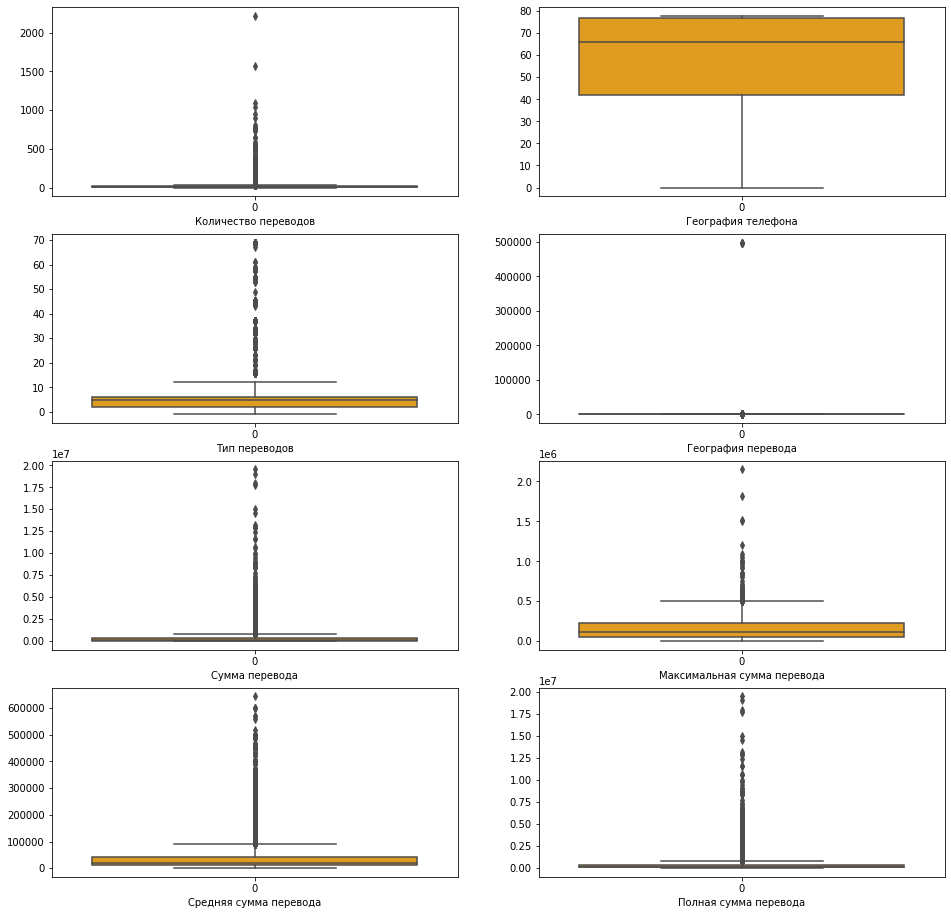

In [58]:

var = ['count_translation', 'geography_phone','type_translation','geography_translation','sum_translation', 'max_sum', 'middle_sum', 'full_sum']
fig, axes = plt.subplots(4, 2, sharey=True, figsize=(16,16))
for i, col in enumerate(var):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=df[col], whis = 1.5, color = "orange")
    plt.xlabel(dict_to_rus[col])

По диаграммам, расположенным выше, делаем вывод,что требуется выделение аномальных значений практически по всем показателям. Детальнее рассмотрим их ниже.

##2.5. Анализ категориальных признаков


In [ ]:
cat_var = ['discipline_without_delay', 'gender', 'channel', 'operator','count_translation','type_translation','geography_translation', 'geography_phone']

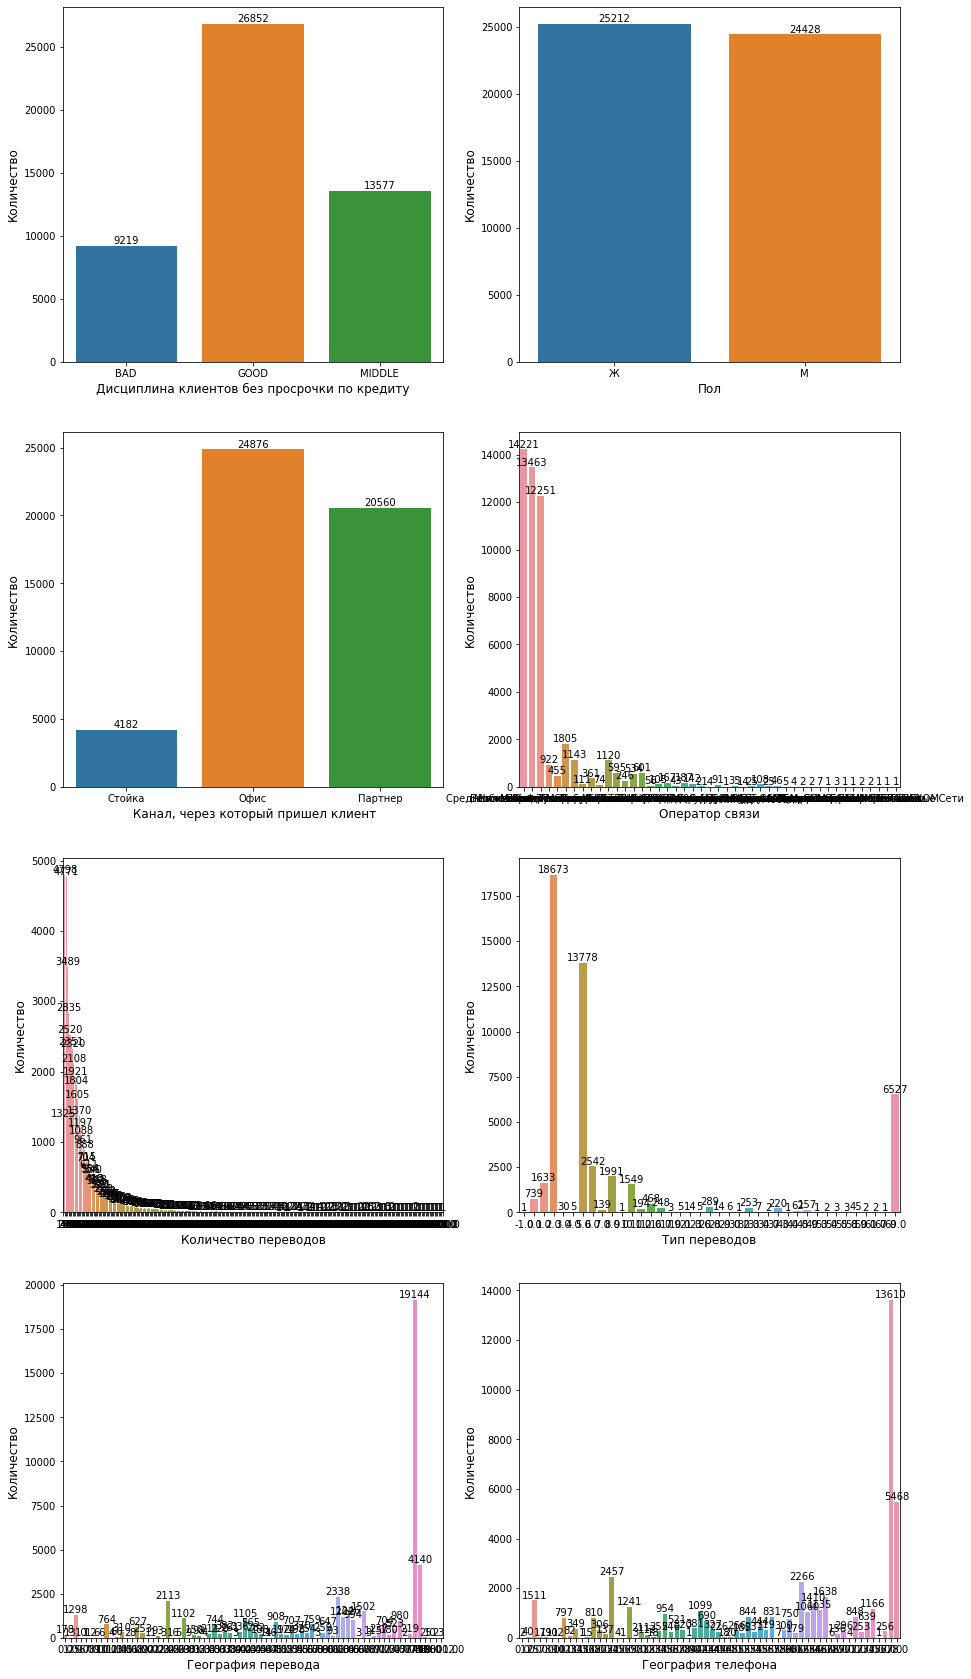

In [ ]:
fig, axes = plt.subplots(8, sharey=True, figsize=(15,30))
i=0
for i, col in enumerate(cat_var):
    plt.subplot(4,2,i+1)
    ax = sns.countplot(x=col, data=df,)
    plt.xlabel(dict_to_rus[col], fontsize = 12)
    plt.ylabel('Количество', fontsize = 12)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:d}'.format(p.get_height()), 
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

Видим,что есть аномальные значения по признакам geography_translation, type_translation, geography_phone

##2.6. Анализ интервальных признаков

In [ ]:
int_var = ['sum_translation', 'max_sum', 'middle_sum', 'full_sum']

In [ ]:
df.groupby(df['discipline_without_delay'])['type_translation'].describe()

,count,mean,std,min,25%,50%,75%,max
discipline_without_delay,,,,,,,,
BAD,9212.0,11.746309,20.845587,0.0,2.0,5.0,8.0,69.0
GOOD,26852.0,15.094965,24.082133,-1.0,2.0,5.0,8.0,69.0
MIDDLE,13551.0,10.523430,19.202184,0.0,2.0,5.0,5.0,69.0


In [ ]:
df.groupby(df['discipline_without_delay'])['max_sum'].describe()

,count,mean,std,min,25%,50%,75%,max
discipline_without_delay,,,,,,,,
BAD,9219.0,152713.956696,134637.546568,100.0,50000.0000,100000.0,200000.0,1021055.00
GOOD,26852.0,174707.550480,143475.824392,50.0,57562.9225,130000.0,250000.0,2150000.00
MIDDLE,13577.0,165085.494550,138644.164341,30.0,55000.0000,120000.0,225000.0,1002762.75


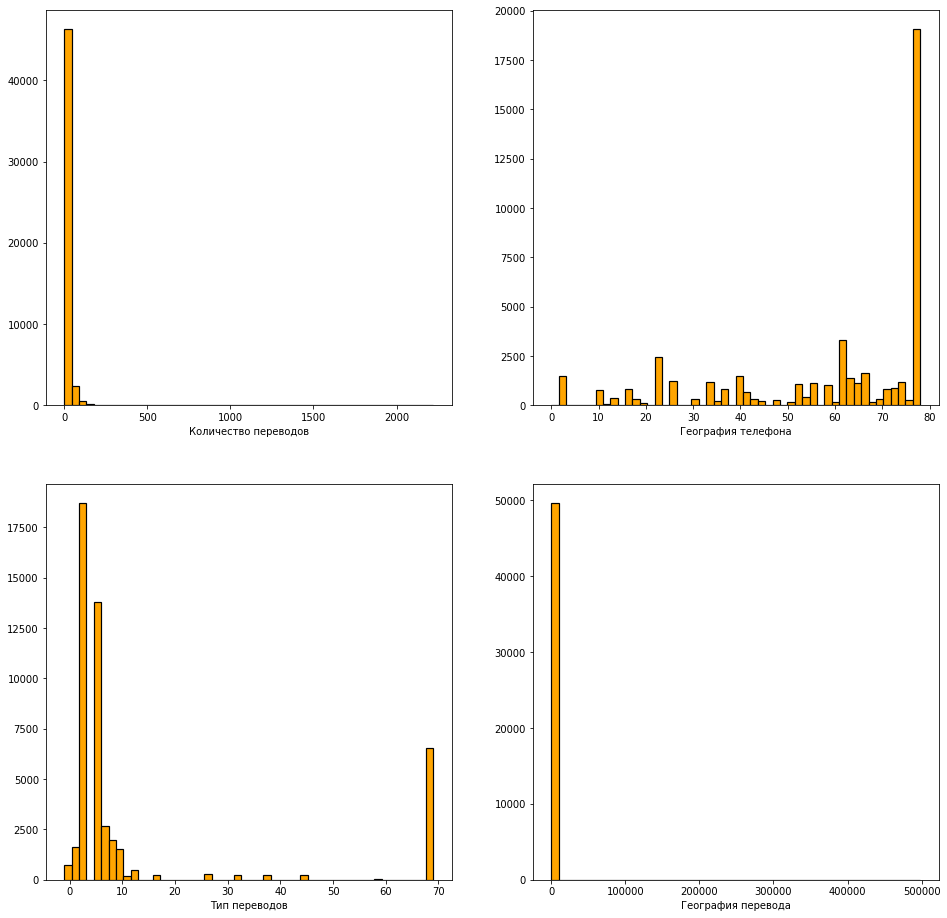

In [59]:

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16,16))
i = 0
l = 0
j = 0
for i in range(2):
    for j in range(2):
        axes[i, j].hist(df[int_var[l]], bins = 50, color = "orange", edgecolor='black', linewidth=1.2)
        axes[i, j].set_xlabel(dict_to_rus[int_var[l]])
        l+=1

По графикам делаем вывод о наличии аномалий в признаках с суммами перевода.
 Создадим датафрейм без аномальных значений, за которые примем:
geography_translation 10<=x<= 80

sum_translation >= 1000000

type_translation <=100

count_translation<=100

In [ ]:
df_final = df[(df.geography_translation <=80) & (df.geography_translation >=10) & (df.sum_translation <= 1000000)& (df.type_translation <=100) & (df.count_translation <= 100)]
df_final.shape[0]

46238

Выделим в отдельный датасет аномальные значения:

In [ ]:
df_anomal = df[(df.geography_translation >80) | (df.geography_translation <10)|(df.sum_translation > 1000000)|(df.type_translation >100) | (df.count_translation>100)]
df_anomal.shape[0]

3347

Посчитаем, сколько процентов составляют аномальные значения от нормальных:

In [ ]:
df_anomal.shape[0]/df_final.shape[0]*100


7.238634889052295

Вывод: Процент аномальных значений не превышает 10%, поэтому дальше будем работать только с нормальными значениями.

Построим "ящики с усами" для "нормальных" данных:

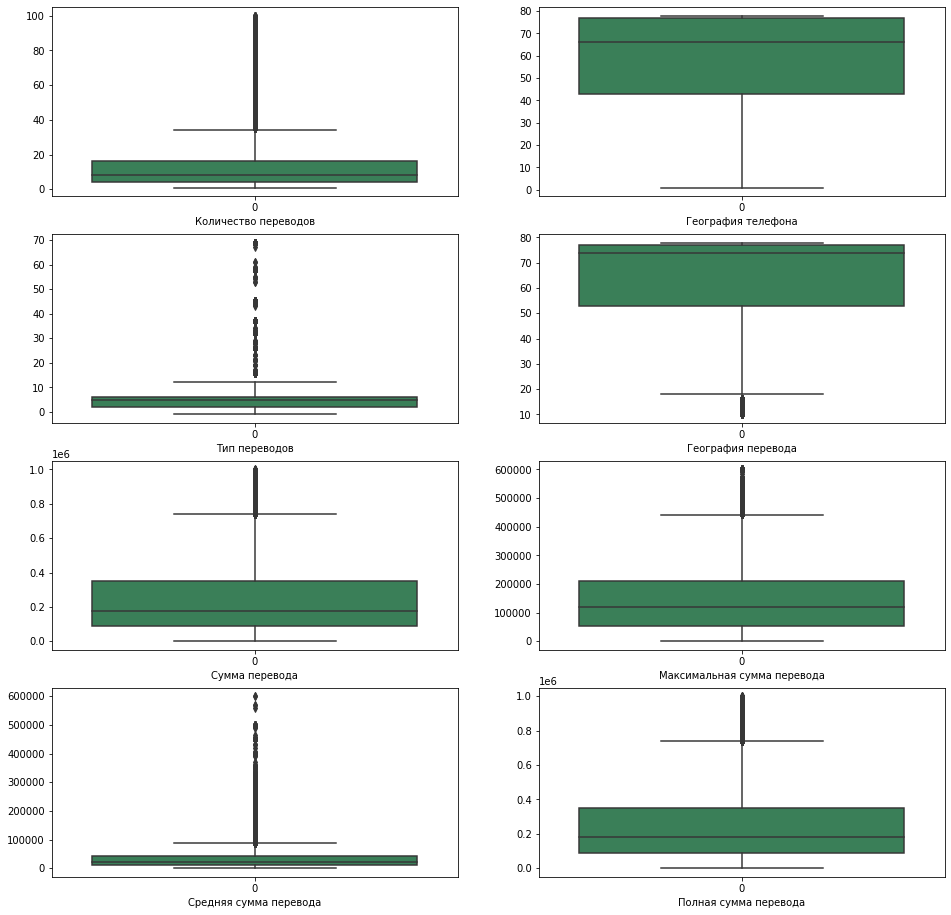

In [ ]:

int_var = ['count_translation', 'geography_phone','type_translation','geography_translation','sum_translation', 'max_sum', 'middle_sum', 'full_sum']
fig, axes = plt.subplots(4, 2, sharey=True, figsize=(16,16))
for i, col in enumerate(int_var):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=df_final[col], whis = 1.5, color = "seagreen")
    plt.xlabel(dict_to_rus[col])

## Вывод 

На данном этапе проведена предобработка данных:
- исправлены заголовки признаков. Для удобства обращения заголовки признаков переведены на английский язык;
- исследованы типы признаков. Установленные типы данных соответствуют содержательному смыслу признаков; 
- изучены признаки, исходя из значений описательных статистик;
- проведен поиск дублирующихся записей. Дублирующиеся записи удалены; 
- проведен анализ аномальных наблюдений. Обнаружены выбросы. Сформирован новый датафрейм, содержащий "нормальные" значения; 
- проведен анализ пропущенных значений. В интервальных признаках пропуски сглажены средними значениями. В остальных позициях, по мнению автора, пропуски в корректировке не нуждаются, т.к. существенного влияния на выводы не окажут. 

Таким образом, имеющиеся данные подготовлены для дальнейшего анализа.

# 3. Добавление новых признаков

Создадим новый признак с возрастом клиента на текущий момент времени:

In [ ]:
df_final["age"] =(pd.to_datetime("today")-pd.to_datetime(df.date_of_birth))
df_final.age = df_final.age.astype('<m8[Y]')
df_final.age.unique()

<ipython-input-46-55559b16160a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["age"] =(pd.to_datetime("today")-pd.to_datetime(df.date_of_birth))
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([41., 43., 65., 45., 44., 39., 50., 53., 57., 58., 59., 46., 47.,
       54., 40., 42., 32., 51., 35., 70., 34., 48., 36., 63., 33., 56.,
       38., 64., 37., 62., 68., 55., 61., 67., 52., 49., 60., 73., 66.,
       75., 71., 76., 72., 69., 77., 74., 78., 31., 81., 79., 80., 82.])

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46238 entries, 0 to 49723
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name_id                   46238 non-null  int64  
 1   date_of_birth             46238 non-null  object 
 2   discipline_without_delay  46237 non-null  object 
 3   count_translation         46238 non-null  float64
 4   type_translation          46238 non-null  float64
 5   geography_translation     46238 non-null  float64
 6   geography_phone           44440 non-null  float64
 7   sum_translation           46238 non-null  float64
 8   max_sum                   46238 non-null  float64
 9   middle_sum                46238 non-null  float64
 10  full_sum                  46238 non-null  float64
 11  channel                   46217 non-null  object 
 12  operator                  45653 non-null  object 
 13  gender                    46231 non-null  object 
 14  age   

#4. Исследовательский анализ данных

В разрезе значений целевого признака (Дисциплина клиентов без просрочки по кредиту) исследуем распределения интервальных и категориальных признаков:

##4.1. Интервальные признаки

 Для интервальных признаков, выделенных выше, исследуем средние по группам с оценкой клиента. В качестве оценок средних воспользуемся выборочном средним и медианой.

In [ ]:
int1_var = ['age','sum_translation', 'max_sum', 'middle_sum', 'full_sum']

In [ ]:
df_mean = df_final.loc[:, df_final.columns != 'name_id'].groupby('discipline_without_delay')[int1_var].agg('mean').T
df_median = df_final.loc[:, df_final.columns != 'name_id'].groupby('discipline_without_delay')[int1_var].agg('median').T

In [ ]:
df_temp_1 = pd.concat([df_mean, df_median], axis = 1)
df_temp_1.columns = ['Выборочное_среднее для bad','Выборочное_среднее для good','Выборочное_среднее для middle', 
                  'Медиана для bad', 'Медиана для good','Медиана для middle']

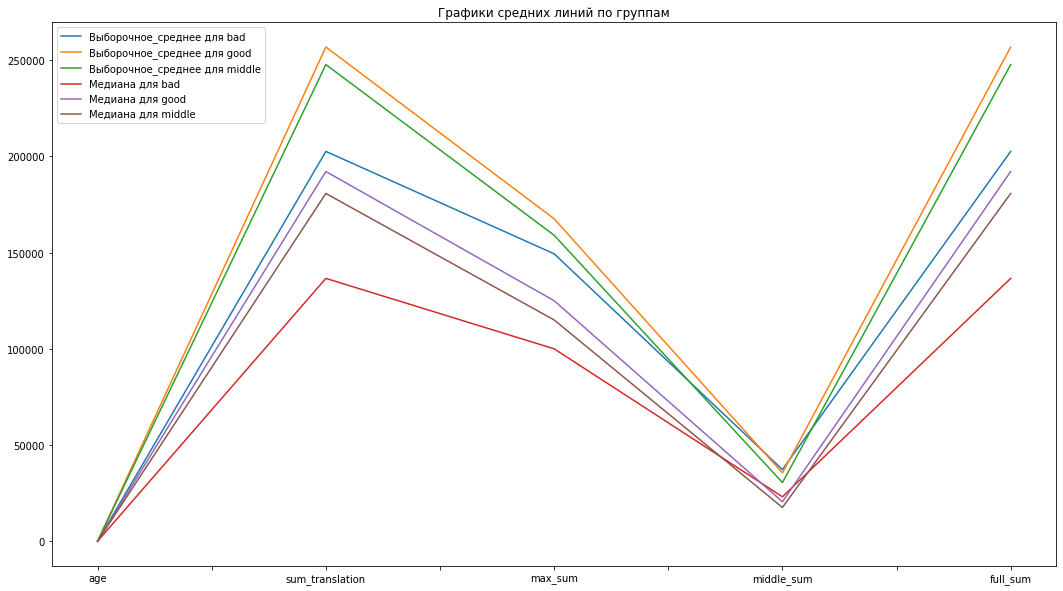

In [ ]:
df_temp_1.plot(kind='line', figsize=(18,10), title='Графики средних линий по группам')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

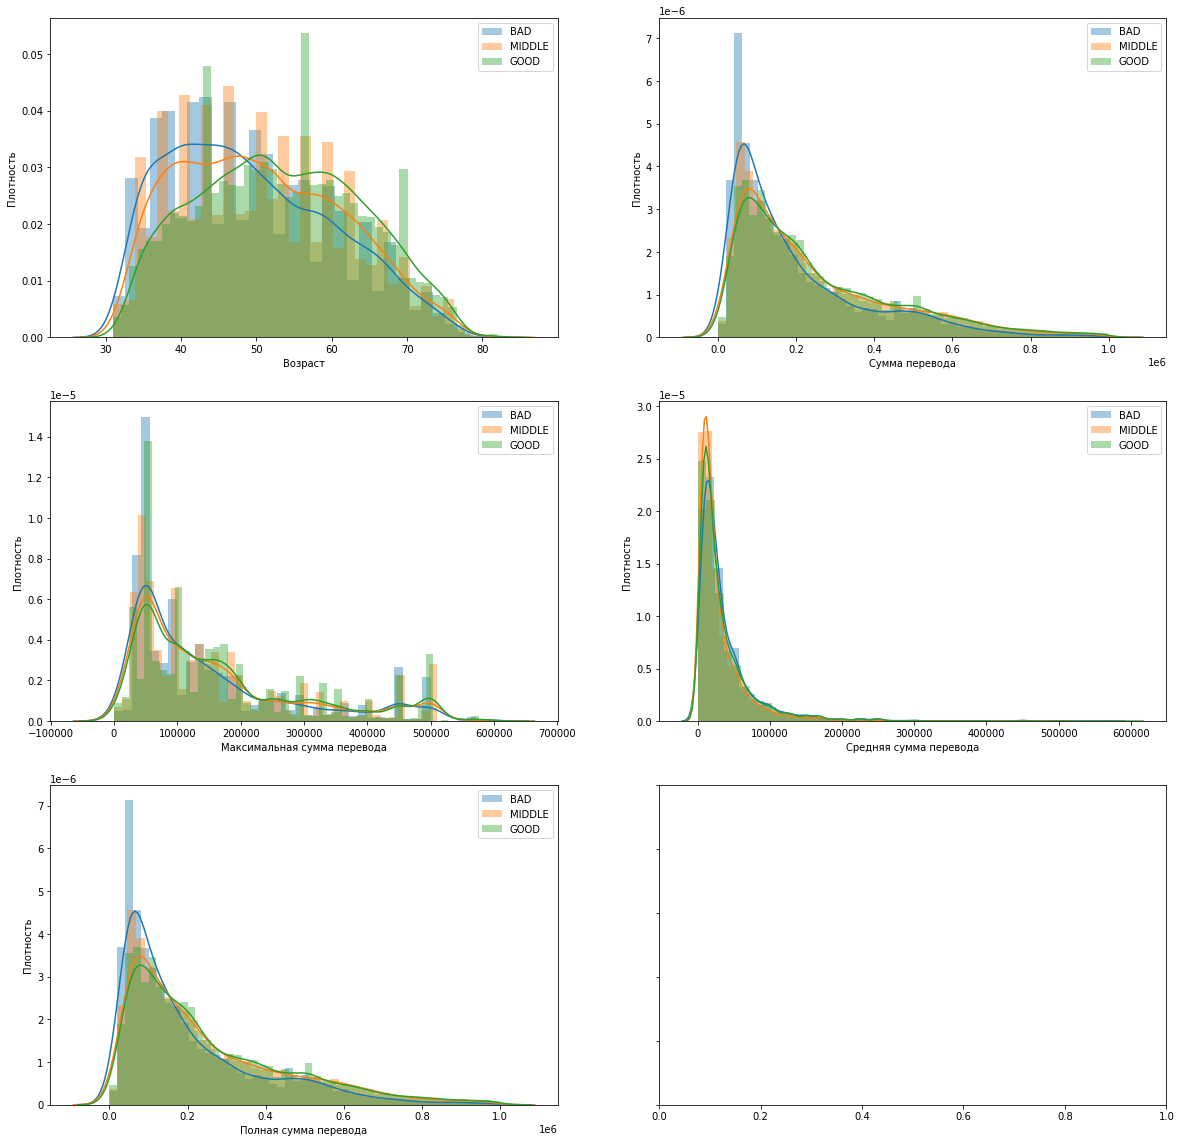

In [ ]:
fig, axes = plt.subplots(3,2, sharey=True, figsize=(20,20))
i=0
for i, col in enumerate(int1_var):
    plt.subplot(3,2,i+1)
    ax = sns.distplot(df_final[df_final.discipline_without_delay == 'BAD'][col], label = 'BAD', )
    ax = sns.distplot(df_final[df_final.discipline_without_delay == 'MIDDLE'][col], label = 'MIDDLE')
    ax = sns.distplot(df_final[df_final.discipline_without_delay == 'GOOD'][col], label = 'GOOD')
    plt.xlabel(dict_to_rus[col])
    plt.ylabel('Плотность')
    plt.legend()

##Вывод
Из графиков можно сделать вывод о том, что клиенты из группы 'BAD' моложе клиентов из групп 'MIDDLE' и 'GOOD'. В группе 'GOOD'  среднее значение возраста 50+. Также по графикам плотности видно, что для клиентов из группы 'BAD' характерно большее количество переводов на  меньшие суммы, нежели у клиентов из других групп

##4.2. Категориальные признаки

 Визуализация категориальных признаков по группам клиентов

In [ ]:
cat1_var = ['gender', 'channel','count_translation', 'type_translation','geography_phone','geography_translation']

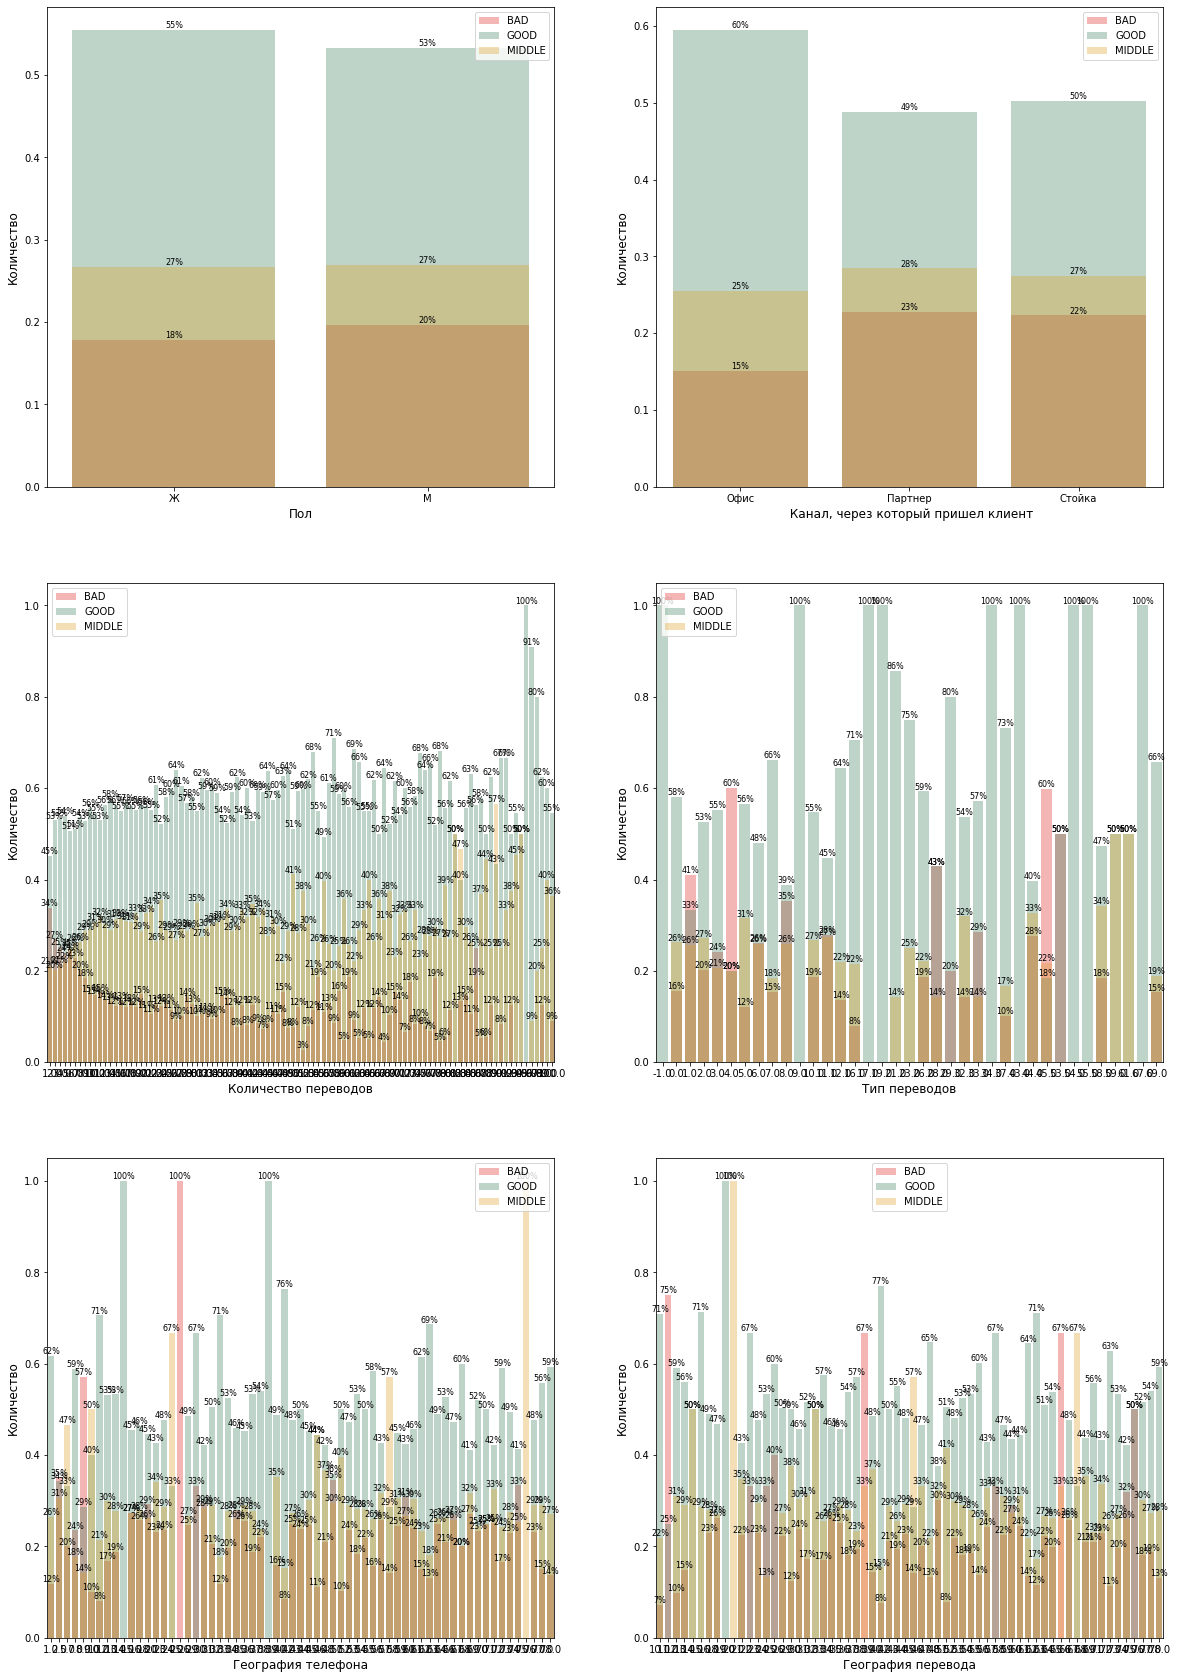

In [ ]:
fig, axes = plt.subplots(6, sharey=True, figsize=(20,30))
i=0
for i, col in enumerate(cat1_var):
    plt.subplot(3,2,i+1)
    data_all = df_final[col].value_counts()
    r = (pd.DataFrame([df_final[df_final.discipline_without_delay== 'BAD'][col].value_counts()/data_all,
                      df_final[df_final.discipline_without_delay== 'GOOD'][col].value_counts()/data_all,
                      df_final[df_final.discipline_without_delay=='MIDDLE'][col].value_counts()/data_all]).T)
    r.columns = ['BAD','GOOD','MIDDLE']
    ax1 = sns.barplot(x = r.index, y = r['BAD'], data = r, color='red', alpha = 0.33, label = 'BAD')
    ax2 = sns.barplot(x = r.index, y = r['GOOD'], data = r, color='seagreen', alpha = 0.33, label = 'GOOD')
    ax3 = sns.barplot(x = r.index, y = r['MIDDLE'], data = r, color='orange', alpha =0.33, label = 'MIDDLE')
    plt.xlabel(dict_to_rus[col], fontsize = 12)
    plt.ylabel('Количество', fontsize = 12)
    plt.legend()
    for p in ax1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax1.annotate('{:.0f}%'.format(100*y), (x.mean(), y),ha='center', va='bottom', fontsize = 8)

**Промежуточный вывод:** Проведем анализ построенных гистограмм для категориальных признаков:
- <span style=color:green> $\checkmark$ </span> по признаку `gender` наблюдаются различия. Женщин немного больше в 'хорошей' группе и меньше в 'плохой', нежели мужчин; 
- <span style=color:red> $\checkmark$ </span> по признаку `channel` видим, что клиенты из группы 'GOOD' приходят в большинстве своем из канала 'Офис', а негативные клиенты от партнеров;
- <span style=color:red> $\checkmark$ </span> по признаку `count_translation` видно предрасположенность клиентов группы 'GOOD' к  большему количеству переводов;
- <span style=color:green> $\checkmark$ </span> по признаку `geography_translation, geography_phone,' type_translation` существенных отличий выявить не удалось.

### Вывод 

В результате работы над проектом удалось составить портрет клиента по признаку "Дисциплина клиентов без просрочки по кредиту" в разрезе признаков 'BAD', 'MIDDLE' и 'GOOD'.
Для поиска данных признаков применен весьма широкий арсенал инструментов: анализ по группам описательных статистик, гистограмм и распределений.
Так, можно отметить, что клиенты с признаком 'BAD' чаще мужчины, чем женщины, в возрасте 35-45 лет, пришедшие от партнеров, предпочитают делать переводы на мелкие суммы.
 Клиенты 'GOOD'- самая многочисленная группа, чаще женского пола, возраста 50+, пришедшие из канала "Офис". Чаще делают переводы на крупные суммы.
 Группа 'MIDDLE',как и следует из названия, представляем собой нечто среднее между клиентами с двумя другими признаками.